In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [9]:
df = pd.read_csv(r'C:\Users\jainb\Desktop\data_analysis_with _python\Data-Analysis-with-Python-GFG-main\35. GDP Analysis - Compare GDP Growth across Countries Advanced\gdp.csv')

In [10]:
df.head()

,Country_Name,Country_Code,Year,Value
0,Arab World,ARB,1968,2.576068e+10
1,Arab World,ARB,1969,2.843420e+10
2,Arab World,ARB,1970,3.138550e+10
3,Arab World,ARB,1971,3.642691e+10
4,Arab World,ARB,1972,4.331606e+10


1. how many unique countries are there ?

In [12]:
df.Country_Name.nunique()

256

In [16]:
df.Country_Name.unique()

array(['Arab World', 'Caribbean small states',
       'Central Europe and the Baltics', 'Early-demographic dividend',
       'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)',
       'East Asia & Pacific (IDA & IBRD countries)', 'Euro area',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)',
       'Europe & Central Asia (IDA & IBRD countries)', 'European Union',
       'Fragile and conflict affected situations',
       'Heavily indebted poor countries (HIPC)', 'High income',
       'IBRD only', 'IDA & IBRD total', 'IDA blend', 'IDA only',
       'IDA total', 'Late-demographic dividend',
       'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Latin America & the Caribbean (IDA & IBRD countries)',
       'Least developed countries: UN classification',
       'Low & middle income', 'Low income', 'Lower middle income',
       'Middle East & North Africa',
       'Middle East & No

2.) How many years of Data we're having for India?

In [14]:
df.Country_Code.unique()

array(['ARB', 'CSS', 'CEB', 'EAR', 'EAS', 'EAP', 'TEA', 'EMU', 'ECS',
       'ECA', 'TEC', 'EUU', 'FCS', 'HPC', 'HIC', 'IBD', 'IBT', 'IDB',
       'IDX', 'IDA', 'LTE', 'LCN', 'LAC', 'TLA', 'LDC', 'LMY', 'LIC',
       'LMC', 'MEA', 'MNA', 'TMN', 'MIC', 'NAC', 'OED', 'OSS', 'PSS',
       'PST', 'PRE', 'SST', 'SAS', 'TSA', 'SSF', 'SSA', 'TSS', 'UMC',
       'WLD', 'AFG', 'ALB', 'DZA', 'ASM', 'AND', 'AGO', 'ATG', 'ARG',
       'ARM', 'ABW', 'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB',
       'BLR', 'BEL', 'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BIH', 'BWA',
       'BRA', 'BRN', 'BGR', 'BFA', 'BDI', 'CPV', 'KHM', 'CMR', 'CAN',
       'CYM', 'CAF', 'TCD', 'CHI', 'CHL', 'CHN', 'COL', 'COM', 'COD',
       'COG', 'CRI', 'CIV', 'HRV', 'CUB', 'CYP', 'CZE', 'DNK', 'DJI',
       'DMA', 'DOM', 'ECU', 'EGY', 'SLV', 'GNQ', 'ERI', 'EST', 'ETH',
       'FRO', 'FJI', 'FIN', 'FRA', 'PYF', 'GAB', 'GMB', 'GEO', 'DEU',
       'GHA', 'GRC', 'GRL', 'GRD', 'GUM', 'GTM', 'GIN', 'GNB', 'GUY',
       'HTI', 'HND',

In [15]:
len(df[df['Country_Code']=='IND'])


57

Create a new columns named as GDP which shows the GDP growth of each country for that year

In [17]:
df.isnull().sum()

Country_Name    0
Country_Code    0
Year            0
Value           0
dtype: int64

In [19]:


final_data = []

for country_name in df['Country_Name'].unique():
    df_pr = df[df['Country_Name'] == country_name]
    data = df_pr.values
    gdp_change = [0]

    for i in range(1,len(data)):
        prev = data[i-1][3]
        cur = data[i][3]
        gdp_change.append(round(((cur - prev) / prev)*100,2))

    df_pr = df_pr.assign(Gdp_growth = gdp_change)
    final_data.append(df_pr)
    
df = pd.concat(final_data, axis = 0)


In [20]:
df.head()

,Country_Name,Country_Code,Year,Value,Gdp_growth
0,Arab World,ARB,1968,2.576068e+10,0.00
1,Arab World,ARB,1969,2.843420e+10,10.38
2,Arab World,ARB,1970,3.138550e+10,10.38
3,Arab World,ARB,1971,3.642691e+10,16.06
4,Arab World,ARB,1972,4.331606e+10,18.91


In [30]:
df_pr1 = df[df['Country_Name'] == 'India']
df_pr2 = df[df['Country_Name'] == 'World']


<AxesSubplot:xlabel='YEARS', ylabel='GDP'>

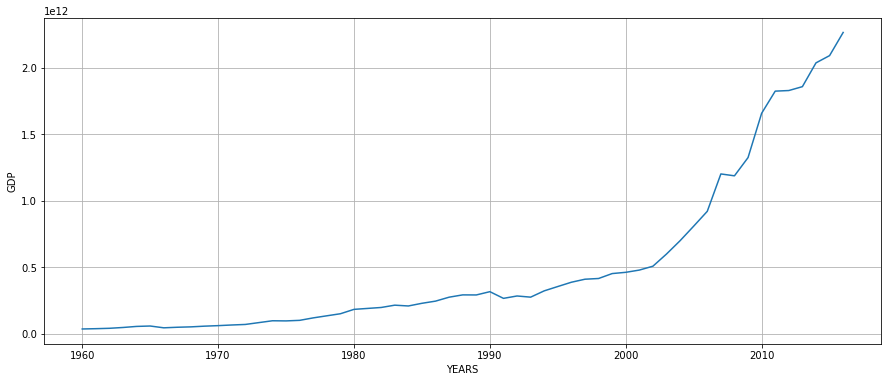

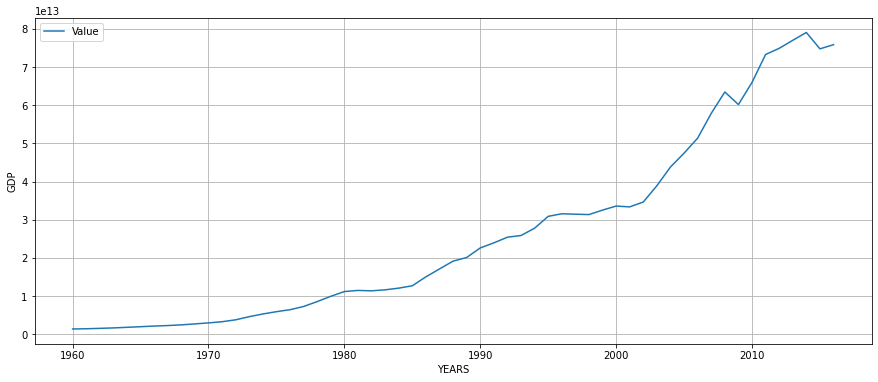

In [34]:
df_pr1.plot(kind = 'line', x = 'Year', y = 'Value',
           figsize = (15,6),
           legend = False,
           grid = True,
           ylabel = 'GDP',
           xlabel = 'YEARS')
df_pr2.plot(kind = 'line', x = 'Year', y = 'Value',
           figsize = (15,6),
           legend = True,
           grid = True,
           ylabel = 'GDP',
           xlabel = 'YEARS')